# Evolution Algorithm 
 
 ## Solving  Large-Scale Route Optimization Problem using Genetik

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
plt.style.use('seaborn')

Stops: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


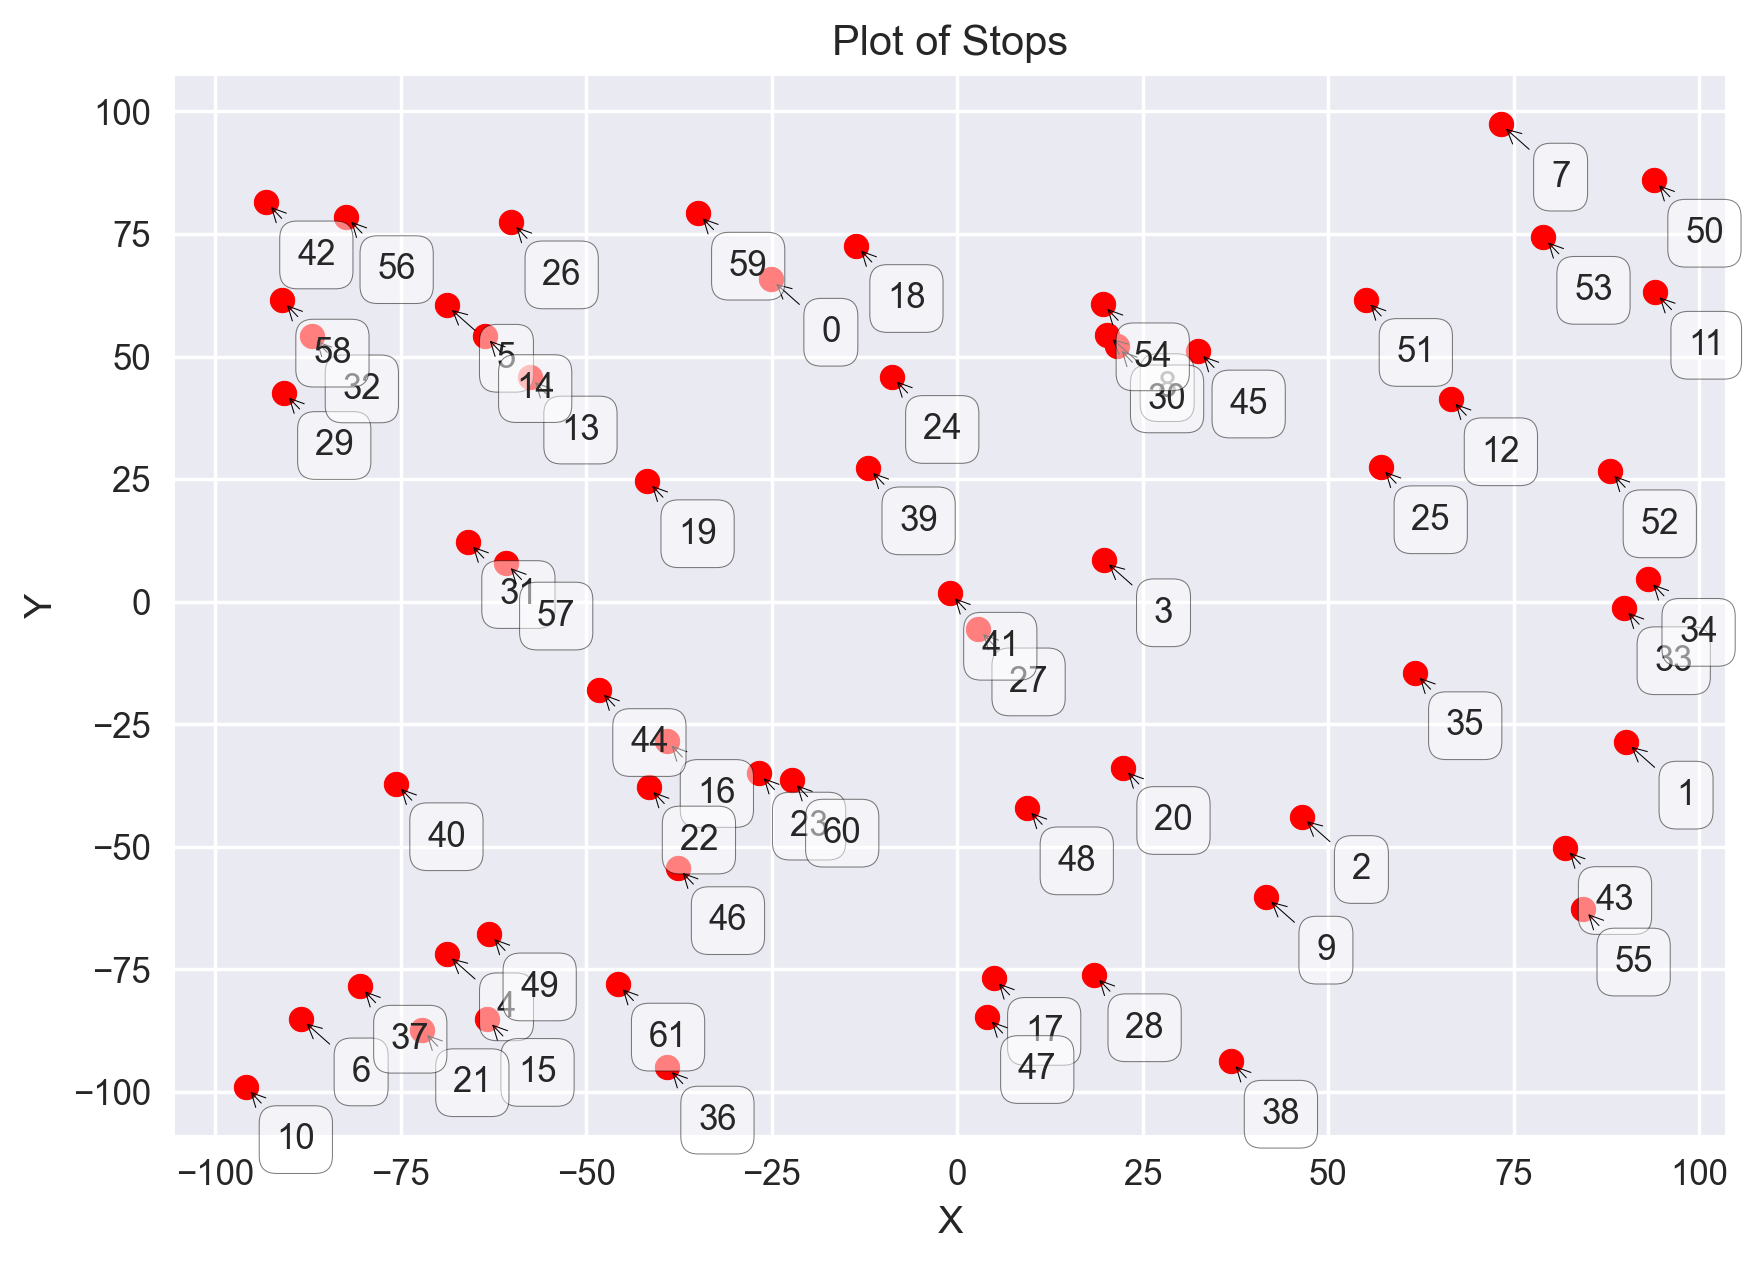

In [393]:
np.random.seed(42)

def make_stops(number_of_stops=62):
    """
    Creates a series of stops by generating random IDs.
    """
    return list(range(number_of_stops))

stops = make_stops()
print("Stops:", stops)

def plot_stops(stops, annotate=True):
    """
    Makes a plot of all stops.
    Input: stops; list of stop IDs
    """
    x = np.random.uniform(-100, 100, size=len(stops))
    y = np.random.uniform(-100, 100, size=len(stops))
    
    plt.figure(dpi=250)
    for idx, (x_val, y_val) in enumerate(zip(x, y)):
        plt.scatter(x_val, y_val, c='r', marker='o')
        if annotate:
            plt.annotate(stops[idx], xy=(x_val, y_val), xytext=(20, -20),
                         textcoords='offset points', ha='right', va='bottom',
                         bbox=dict(boxstyle='round,pad=0.5', fc='w', alpha=0.5),
                         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Plot of Stops')
    plt.grid(True)
    plt.show()

plot_stops(stops)


In [396]:
# Read the datasets as dataframe
distances=pd.read_csv('distance.csv')
orders=pd.read_csv('order_large.csv')
distances.head()

,Source,Destination,Distance(M)
0,City_24,City_47,1114251
1,City_24,City_31,97187
2,City_24,City_54,1716028
3,City_24,City_53,1729925
4,City_24,City_19,1594107


In [397]:
#Read the first five rows
orders.head()

,Order_ID,Material_ID,Item_ID,Source,Destination,Available_Time,Deadline,Danger_Type,Area,Weight
0,A140109,B-6128,P01-79c46a02-e12f-41c4-9ec9-25e48597ebfe,City_61,City_54,2022-04-05 23:59:59,2022-04-11 23:59:59,type_1,38880,30920000
1,A140109,B-6128,P01-43f08b0f-87f8-4a3f-91b8-40ed1947bdaa,City_61,City_54,2022-04-05 23:59:59,2022-04-11 23:59:59,type_1,38880,30920000
2,A140109,B-6128,P01-899d7387-aab0-4443-b6ba-7520fb4ee981,City_61,City_54,2022-04-05 23:59:59,2022-04-11 23:59:59,type_1,38880,30920000
3,A140109,B-6128,P01-acc23cdf-7fe7-4388-b8ff-5704eed86ef5,City_61,City_54,2022-04-05 23:59:59,2022-04-11 23:59:59,type_1,38880,30920000
4,A140109,B-6128,P01-cd0377d4-770c-45c3-9bd8-a5b098246e7e,City_61,City_54,2022-04-05 23:59:59,2022-04-11 23:59:59,type_1,38880,30920000


In [401]:
import random
np.random.seed(42)

import random

import random

def create_generation(warehouses, order_destinations, max_stops_per_truck, population_size):
    """
    Creates initial routes for each truck considering constraints.
    Routes are represented as lists of integer indices corresponding to the locations.
    """
    # Set a fixed seed for reproducibility
    random.seed(0)
    
    initial_routes = []
    all_stops = list(set(warehouses + order_destinations))  # Convert to list and remove duplicates
    
    # Remove the "City_" prefix and convert to integers
    all_stops = [int(city.split('_')[1]) for city in all_stops]
    
    # Sort the stops to ensure reproducibility
    all_stops.sort()
    
    # Calculate the number of stops for each route
    num_unique_stops = len(all_stops)
    num_stops_per_route = min(max_stops_per_truck, num_unique_stops)
    
    # Create routes for each truck
    for _ in range(population_size):
        # Randomly select a number of stops for this route within the range
        stops_for_this_route = random.sample(all_stops, num_stops_per_route)
        initial_routes.append(stops_for_this_route)
    
    return initial_routes
    return initial_routes

population_size = 50
max_stops_per_route = 5
test_generation = create_generation(warehouses, order_destinations, max_stops_per_route, population_size)




max_stops_per_truck = 5 # Adjust this based on constraints
# Extract unique warehouse locations from the 'Source' column of distances DataFrame
warehouses = distances['Source'].unique().tolist()

# Extract unique order destinations from the 'Destination' column of orders DataFrame
order_destinations = orders['Destination'].unique().tolist()

print("Warehouses:", warehouses)
print("Order Destinations:", order_destinations)
all_stops = list(set(warehouses + order_destinations))  # Convert to list and remove duplicates
print("all stops",all_stops)
# Remove the "City_" prefix and convert to integers
all_stops = [int(city.split('_')[1]) for city in all_stops]
print('update all_stops',all_stops)



Warehouses: ['City_24', 'City_47', 'City_31', 'City_54', 'City_53', 'City_19', 'City_12', 'City_46', 'City_45', 'City_51', 'City_6', 'City_20', 'City_56', 'City_35', 'City_48', 'City_57', 'City_58', 'City_42', 'City_13', 'City_14', 'City_37', 'City_30', 'City_5', 'City_41', 'City_52', 'City_26', 'City_21', 'City_28', 'City_36', 'City_44', 'City_43', 'City_10', 'City_32', 'City_33', 'City_3', 'City_9', 'City_34', 'City_59', 'City_16', 'City_29', 'City_8', 'City_40', 'City_11', 'City_23', 'City_4', 'City_25', 'City_15', 'City_27', 'City_55', 'City_39', 'City_49', 'City_17', 'City_38', 'City_0', 'City_1', 'City_22', 'City_2', 'City_18', 'City_50', 'City_60', 'City_7', 'City_61']
Order Destinations: ['City_54', 'City_53', 'City_45', 'City_31', 'City_19', 'City_12', 'City_51', 'City_47', 'City_6', 'City_48', 'City_46', 'City_20', 'City_55', 'City_39', 'City_17', 'City_5', 'City_15', 'City_27', 'City_35', 'City_44', 'City_34', 'City_58', 'City_25', 'City_37', 'City_13', 'City_14', 'City_4', 

In [404]:
#Test the method Create_generation
test_generation=create_generation(warehouses ,order_destinations,5,50)
test_generation

[[54, 24, 48, 56, 26],
 [2, 16, 61, 32, 31],
 [25, 58, 50, 53, 19],
 [61, 30, 22, 37, 57],
 [58, 13, 32, 8, 18],
 [8, 48, 6, 39, 51],
 [16, 58, 34, 45, 51],
 [38, 57, 9, 19, 6],
 [46, 4, 57, 54, 43],
 [21, 30, 35, 6, 22],
 [27, 20, 39, 40, 58],
 [13, 61, 35, 30, 28],
 [55, 33, 16, 3, 51],
 [58, 35, 0, 5, 46],
 [53, 25, 45, 52, 50],
 [42, 40, 0, 39, 31],
 [52, 55, 21, 15, 46],
 [20, 45, 55, 4, 12],
 [58, 36, 14, 15, 51],
 [61, 9, 51, 34, 28],
 [5, 20, 56, 32, 59],
 [31, 6, 19, 35, 18],
 [45, 7, 35, 21, 52],
 [59, 34, 13, 61, 51],
 [38, 35, 37, 18, 28],
 [5, 38, 51, 24, 20],
 [36, 15, 18, 11, 12],
 [52, 11, 2, 39, 42],
 [16, 30, 4, 5, 43],
 [48, 8, 56, 9, 59],
 [2, 53, 5, 57, 44],
 [59, 53, 34, 43, 25],
 [53, 45, 33, 17, 51],
 [15, 54, 13, 57, 43],
 [37, 52, 60, 26, 17],
 [28, 31, 42, 41, 44],
 [58, 50, 22, 5, 20],
 [39, 7, 31, 37, 40],
 [21, 54, 12, 15, 1],
 [46, 17, 7, 45, 14],
 [23, 50, 10, 21, 27],
 [52, 3, 6, 50, 9],
 [54, 44, 14, 2, 52],
 [36, 40, 58, 59, 34],
 [38, 43, 4, 1, 7],
 

In [420]:
 # Create a mapping between city names and their indices
city_to_index = {city: i for i, city in enumerate(set(warehouses + order_destinations))}
index_to_city = {i: city for city, i in city_to_index.items()}

def distance_between_cities(city1_name, city2_name):
    """
    Given two city names, this calculates the distance between them using the distances DataFrame.
    """
    distance = distances.loc[(distances['Source'] == city1_name) & (distances['Destination'] == city2_name), 'Distance(M)']
    if not distance.empty:
        return distance.values[0]
    else:
        # If no direct distance is found, return a large value as a placeholder
        return float('inf')
    
def fitness_score(route, cost_of_truck, max_truck_weight, max_truck_area, max_stops_per_truck, START_TIME, city_to_index, index_to_city):
    """
    Calculates the fitness score of a given route.
    """
    total_distance = 0
    total_penalty = 0
    
    # Calculate the total distance of the route
    for i in range(len(route) - 1):
        if route[i] != -99 and route[i + 1] != -99:  # Skip placeholders
            city1_name = index_to_city[route[i]]  # Get the name of the first city
            city2_name = index_to_city[route[i + 1]]  # Get the name of the second city
            total_distance += distance_between_cities(city1_name, city2_name) * cost_of_truck
    
    # Calculate penalties for violating constraints
    total_penalty += is_feasible_route(route, max_truck_weight, max_truck_area, max_stops_per_truck, START_TIME)
    
    # Return the total fitness score
    return total_distance + total_penalty


def check_fitness(initial_routes, city_to_index, index_to_city):
    """
    Calculates the fitness score for each initial route (truck) in the given list of guesses.
    Returns a list of tuples: (initial_route, fitness_score).
    """
    fitness_scores = []
    all_stops = list(set(warehouses + order_destinations))
    for route in initial_routes:
        fitness_scores.append((route, fitness_score(route, 3, 1918271, 117161, 10, 0.0, city_to_index, index_to_city)))
    return fitness_scores

print(check_fitness(test_generation, city_to_index, index_to_city))


[([54, 24, 48, 56, 26], 18495415), ([2, 16, 61, 32, 31], 14875471), ([25, 58, 50, 53, 19], 19201447), ([61, 30, 22, 37, 57], 14528578), ([58, 13, 32, 8, 18], 13087516), ([8, 48, 6, 39, 51], 10491343), ([16, 58, 34, 45, 51], 21254311), ([38, 57, 9, 19, 6], 12278182), ([46, 4, 57, 54, 43], 14299645), ([21, 30, 35, 6, 22], 19790179), ([27, 20, 39, 40, 58], 3839263), ([13, 61, 35, 30, 28], 19937995), ([55, 33, 16, 3, 51], 16858921), ([58, 35, 0, 5, 46], 8336104), ([53, 25, 45, 52, 50], 18004951), ([42, 40, 0, 39, 31], 10566376), ([52, 55, 21, 15, 46], 9425827), ([20, 45, 55, 4, 12], 19785235), ([58, 36, 14, 15, 51], 12656017), ([61, 9, 51, 34, 28], 18052114), ([5, 20, 56, 32, 59], 19066519), ([31, 6, 19, 35, 18], 12873784), ([45, 7, 35, 21, 52], 16505329), ([59, 34, 13, 61, 51], 17817313), ([38, 35, 37, 18, 28], 16769152), ([5, 38, 51, 24, 20], 9143461), ([36, 15, 18, 11, 12], 24607327), ([52, 11, 2, 39, 42], 13364770), ([16, 30, 4, 5, 43], 24086482), ([48, 8, 56, 9, 59], 9389176), ([2, 53

In [421]:
# Handling the constraints
from datetime import datetime
def is_feasible_route(route, max_truck_weight, max_truck_area, max_stops_per_truck, START_TIME):
    """
    Checks if a given route is violating capacity, available time, and deadlines.
    """
    
    total_penalty = 0
    
    # Initialize variables for total weight and area of orders
    total_weight = 0
    total_area = 0
    
    # Initialize variables for earliest available time and latest deadline
    earliest_available_time = float('inf')
    latest_deadline = float('-inf')
    
    # Iterate through each stop in the route
    for stop in route:
        # Get the orders for the current stop
        orders_at_stop = orders[(orders['Source'] == stop)]
        
        if not orders_at_stop.empty:
            # Check truck capacity constraints
            total_weight += orders_at_stop['Weight'].sum()
            total_area += orders_at_stop['Area'].sum()
            
            #Convert the 'Available_Time' column to datetime
            orders['Available_Time'] = pd.to_datetime(orders['Available_Time'])
            # Update earliest available time and latest deadline
            earliest_available_time = orders_at_stop['Available_Time'].min().timestamp()
            earliest_available_time = min(earliest_available_time, float(orders_at_stop['Available_Time'].min().timestamp()))
            latest_deadline = max(latest_deadline, orders_at_stop['Deadline'].max())
    
    # Check if truck capacity exceeds limits
    if total_weight > max_truck_weight or total_area > max_truck_area:
        total_penalty += 1
    
    # Check if truck starts its route when all items are available
    if earliest_available_time >float(START_TIME) :
        total_penalty += 1
    
    # Check if all items are delivered before their deadlines
    if latest_deadline != float('-inf'):
        if latest_deadline > orders['Deadline'].max():
            total_penalty += 1
    
    # Check maximum stops per truck
    if len(route) > max_stops_per_truck:
        total_penalty += 1
    
    return total_penalty




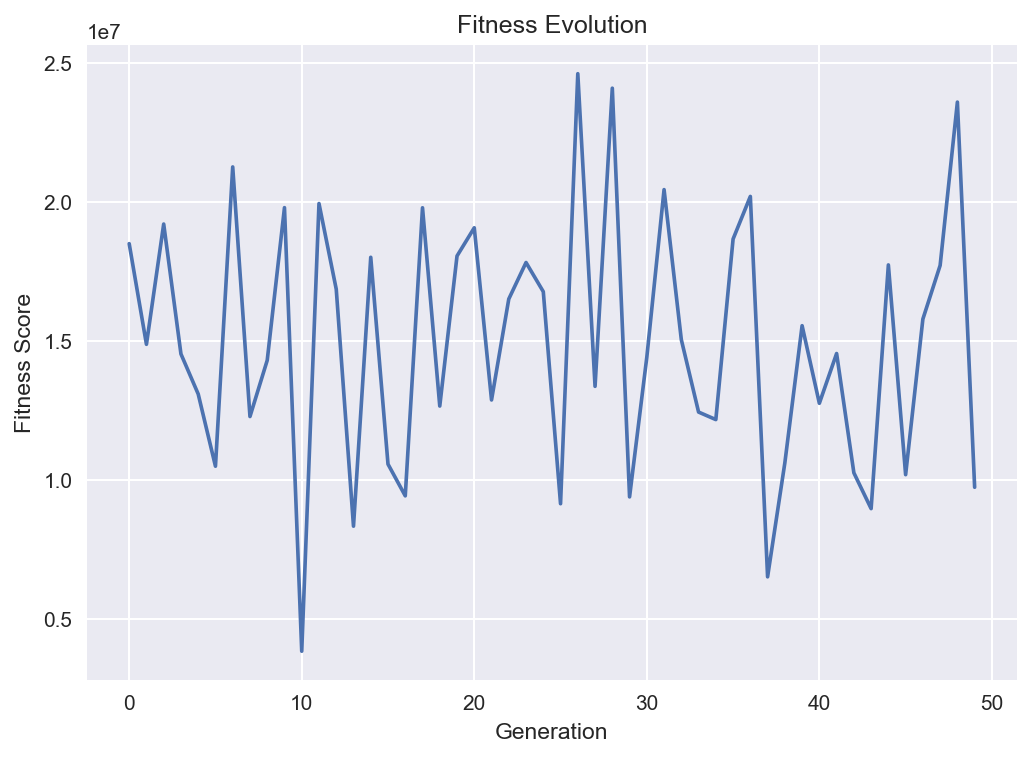

In [422]:

def make_fitness_tracking_plot(fitness_tracking, title="Fitness Evolution", xlabel="Generation", ylabel="Fitness Score"):
    """
    Given a list of fitness scores, plot it versus the generation number
    """
    plt.figure(dpi=150)
    
    # Check if fitness_tracking is a list or array
    if isinstance(fitness_tracking[0], (list, tuple)):
        fitness_scores = [score[1] for score in fitness_tracking]
        plt.plot(range(len(fitness_scores)), fitness_scores)
    else:
        plt.plot(range(len(fitness_tracking)), fitness_tracking)
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

# Example usage
fitness_tracking = check_fitness(test_generation, city_to_index, index_to_city)
make_fitness_tracking_plot(fitness_tracking)



In [79]:
# Now we need to setup a breeding program. So what does that entail? We can't take random cities from each parent,
# we might get the same city in there twice. So instead we'll take a random set of the cities from parent 1 and hold them
# in place. Then well fill in with cities from parent 2, going left to right and making sure no duplicates occur.

In [423]:
import itertools

def get_breeders_from_generation(guesses, take_best_N=10, take_random_N=5, verbose=False):
    """
    Sets up the breeding group for the next generation.
    """
    # Create a mapping between city names and their indices
    city_to_index = {city: i for i, city in enumerate(set(warehouses + order_destinations))}
    index_to_city = {i: city for city, i in city_to_index.items()}
    
    # First, get the top guesses from last time
    fit_scores = [(route, fitness_score(route, 3, 1918271, 117161, 10, 0.0, city_to_index,index_to_city)) for route in guesses]
    sorted_guesses = sorted(fit_scores, key=lambda x: x[1])
    new_generation = [x[0] for x in sorted_guesses[:take_best_N]]
    best_guess = new_generation[0]
    
    if verbose:
        print("Best guess:", best_guess)
        
    # second  flatten the list of lists
    flattened_guesses = list(itertools.chain.from_iterable(guesses))
   # Then, select random guesses from the flattened list
    random_guesses = np.random.choice(flattened_guesses, size=take_random_N, replace=False)
    new_generation.extend(random_guesses)
    
    return new_generation, best_guess



def make_child(parent1, parent2):
    """ 
    Makes a child from two parents.
    """
    # Convert parents to lists
    parent1 = list(parent1)
    parent2 = list(parent2)
    
    # Choose a random subset of the parent1 route
    parent1_subset_indices = np.random.choice(len(parent1), replace=False, size=len(parent1)//2)
    child = [-99 for _ in parent1]
    
    # Fill in the child with the subset from parent1
    for ix in parent1_subset_indices:
        child[ix] = parent1[ix]
    
    # Fill in the rest of the child with cities from parent2
    for ix, gene in enumerate(child):
        if gene == -99:
            for gene2 in parent2:
                if gene2 not in child:
                    child[ix] = gene2
                    break
    
    # Ensure the route ends where it starts
    child[-1] = child[0]
    
    return child


def make_children(old_generation, children_per_couple=1):
    """
    Pairs parents together, and makes children for each pair.
    """
    mid_point = len(old_generation) // 2
    next_generation = [] 
    
    for ix, parent1 in enumerate(old_generation[:mid_point]):
        parent2 = old_generation[-ix-1]
        # Ensure parent2 is a list
        if not isinstance(parent2, list):
            parent2 = [parent2]  
        for _ in range(children_per_couple):
            # Ensure parent1 is a list
            if not isinstance(parent1, list):
                parent1 = [parent1]  
            next_generation.append(make_child(parent1, parent2))
    
    return next_generation





In [424]:
# Test make child 
# Select two parent routes from the test_generation
parent1 = test_generation[0]
parent2 = test_generation[1]

# Call the make_child function to create a child route
child = make_child(parent1, parent2)

# Print the child route
print("Child Route:", child)


Child Route: [54, 2, 48, 16, 54]


In [425]:
breeders, _ = get_breeders_from_generation(test_generation)
print(breeders)
print(make_children(breeders, children_per_couple=2))

[[27, 20, 39, 40, 58], [39, 7, 31, 37, 40], [58, 35, 0, 5, 46], [36, 40, 58, 59, 34], [5, 38, 51, 24, 20], [48, 8, 56, 9, 59], [52, 55, 21, 15, 46], [13, 46, 51, 3, 59], [40, 12, 38, 53, 36], [54, 44, 14, 2, 52], 24, 18, 31, 43, 4]
[[4, -99, 39, 40, 4], [27, 20, 4, -99, 27], [39, 43, -99, -99, 39], [39, 43, -99, 37, 39], [58, 31, -99, 5, 58], [58, 35, 31, -99, 58], [18, 40, -99, -99, 18], [18, 40, -99, 59, 18], [5, 24, -99, -99, 5], [-99, -99, -99, 24, -99], [54, 44, 56, 14, 54], [54, 8, 44, 9, 54], [40, 55, 21, 12, 40], [52, 40, 12, 38, 52]]


In [426]:
# Create the initial generation
current_generation = create_generation(warehouses, order_destinations, max_stops_per_truck=5,population_size=50)

# Define how often to print generation information
print_every_n_generations = 5

# Run the main loop for a certain number of generations
for i in range(30):
    if not i % print_every_n_generations:
        print("Generation %i: "%i, end='')
        print(len(current_generation))
        is_verbose = True
    else:
        is_verbose = False
    
    # Get breeders from the current generation
    breeders, best_guess = get_breeders_from_generation(current_generation, 
                                                        take_best_N=250, take_random_N=100, 
                                                        verbose=is_verbose)
    
    # Create children from the breeders
    current_generation = make_children(breeders, children_per_couple=3)


Generation 0: 50
Best guess: [27, 20, 39, 40, 58]
Generation 5: 525
Best guess: [58, -99, -99, -99, 58]
Generation 10: 525
Best guess: [9, -99, -99, -99, 9]
Generation 15: 525
Best guess: [-99, -99, -99, -99, -99]
Generation 20: 525
Best guess: [-99, -99, -99, -99, -99]
Generation 25: 525
Best guess: [-99, -99, -99, -99, -99]


Generation 5: 330
Current Best Score:  1
Best guess: [53, -99, -99, -99, 53]
Generation 10: 330
Current Best Score:  1
Best guess: [-99, -99, -99, -99, -99]
Generation 15: 330
Current Best Score:  1
Best guess: [-99, -99, -99, -99, -99]
Generation 20: 330
Current Best Score:  1
Best guess: [-99, -99, -99, -99, -99]
Generation 25: 330
Current Best Score:  1
Best guess: [-99, -99, -99, -99, -99]
Generation 30: 330
Current Best Score:  1
Best guess: [-99, -99, -99, -99, -99]
Generation 35: 330
Current Best Score:  1
Best guess: [-99, -99, -99, -99, -99]
Generation 40: 330
Current Best Score:  1
Best guess: [-99, -99, -99, -99, -99]
Generation 45: 330
Current Best Score:  1
Best guess: [-99, -99, -99, -99, -99]
Generation 50: 330
Current Best Score:  1
Best guess: [-99, -99, -99, -99, -99]
Generation 55: 330
Current Best Score:  1
Best guess: [-99, -99, -99, -99, -99]
Generation 60: 330
Current Best Score:  1
Best guess: [-99, -99, -99, -99, -99]
Generation 65: 330
Current Best Score:  1
B

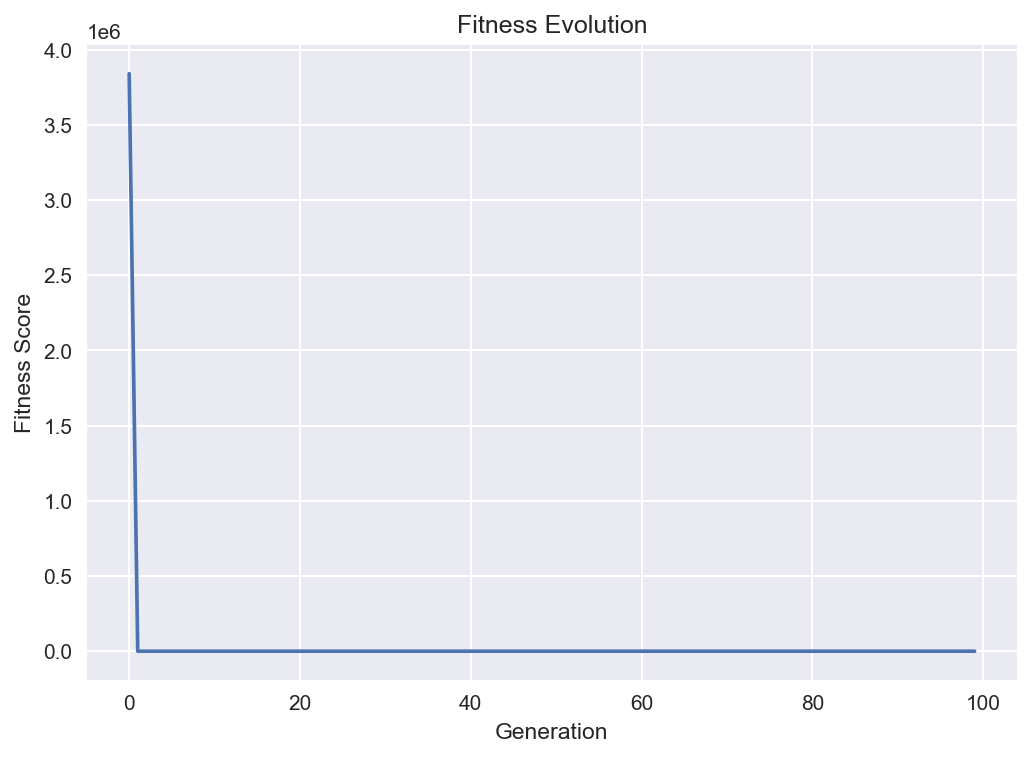

In [428]:
def evolve_to_solve(current_generation, max_generations, take_best_N, take_random_N,
                    children_per_couple, print_every_n_generations, verbose=False):
    """
    Takes in a generation of guesses then evolves them over time using our breeding rules.
    Continue this for "max_generations" times.
    Inputs:
    current_generation: The first generation of guesses
    max_generations: how many generations to complete
    take_best_N: how many of the top performers get selected to breed
    take_random_N: how many random guesses get brought in to keep genetic diversity
    children_per_couple: how many children per breeding pair
    print_every_n_generations: how often to print in verbose mode
    verbose: Show printouts of progress
    Returns:
    fitness_tracking: a list of the fitness score at each generations
    best_guess: the best_guess at the end of evolution
    """
    fitness_tracking = []
    for i in range(max_generations):
        if verbose and not i % print_every_n_generations and i > 0:
            print("Generation %i: " % i, end='')
            print(len(current_generation))
            print("Current Best Score: ", fitness_tracking[-1])
            is_verbose = True
        else:
            is_verbose = False
        breeders, best_guess = get_breeders_from_generation(current_generation, 
                                                            take_best_N=take_best_N, take_random_N=take_random_N, 
                                                            verbose=is_verbose)
        fitness_tracking.append(fitness_score(best_guess, 3, 1918271, 117161, 10, 0.0, city_to_index, index_to_city))
        current_generation = make_children(breeders, children_per_couple=children_per_couple)
    
    return fitness_tracking, best_guess

# Example usage
current_generation = create_generation(warehouses, order_destinations, max_stops_per_truck, population_size)
fitness_tracking, best_guess = evolve_to_solve(current_generation, 100, 150, 70, 3, 5, verbose=True)
make_fitness_tracking_plot(fitness_tracking)


# 